<a href="https://colab.research.google.com/github/Rankit1/evs/blob/main/EcoTrack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#   Install compatible versions
!pip uninstall -y numpy
!pip install numpy==1.23.5
!pip install catboost --upgrade --quiet

Found existing installation: numpy 1.23.5
Uninstalling numpy-1.23.5:
  Successfully uninstalled numpy-1.23.5
Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 4, in <module>
    from pip._internal.cli.main import main
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/main.py", line 11, in <module>
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/main_parser.py", line 9, in <module>
    from pip._internal.build_env import get_runnable_pip
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/build_env.py", line 19, in <module>
    from pip._internal.cli.spinners import open_spinner
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/spinners.py", line 9, in <module>
    from pip._internal.utils.logging import get_indentation
  File "/usr/local/

<ipython-input-2-7719ff129be7>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Vehicle Type'].fillna('unknown', inplace=True)


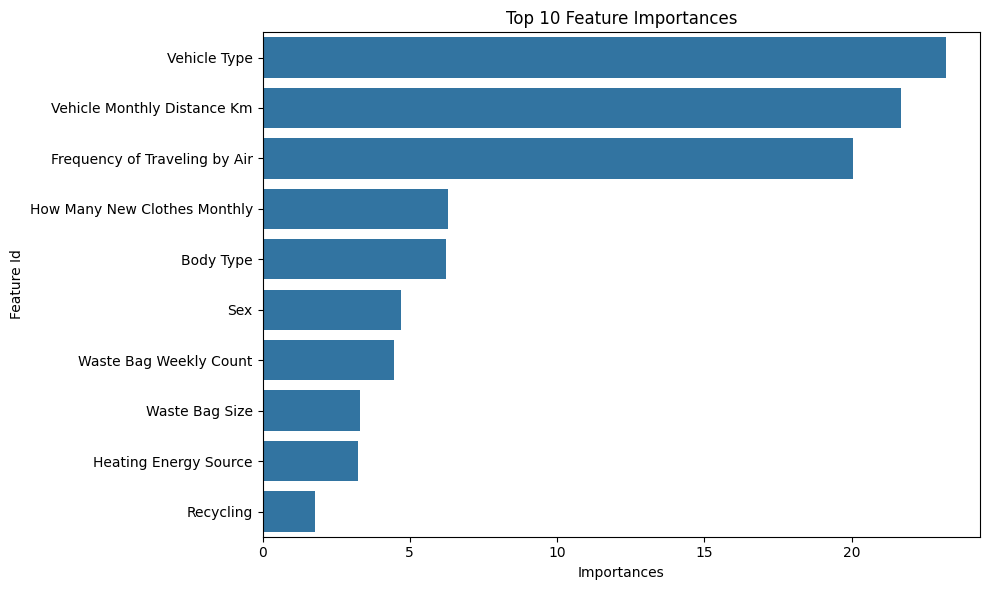

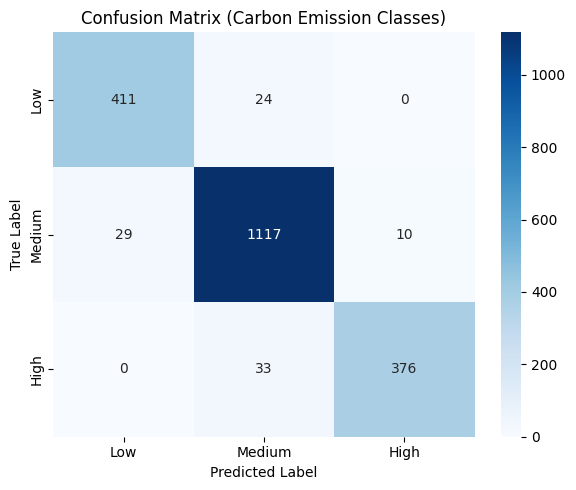

✅ RMSE: 124.02
✅ Accuracy: 0.95
✅ Precision: 0.95
✅ Recall: 0.95
✅ F1 Score: 0.95

📋 Suggested Areas to Reduce Emissions:
- Limit private vehicle usage or switch to EV.
- Limit private vehicle usage or switch to EV.
- Buy fewer new clothes each month.
- Reduce and properly manage your waste output.
- Reduce and properly manage your waste output.
- Improve energy efficiency at home.


In [2]:
#  Step 1: Install CatBoost
!pip install catboost
!pip install -U scikit-learn

#  Step 2: Import Libraries
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_squared_error, confusion_matrix, classification_report,
    accuracy_score, precision_score, recall_score, f1_score
)
import seaborn as sns
import matplotlib.pyplot as plt

#  Step 3: Load Dataset
df = pd.read_csv("Carbon Emission.csv")

#  Step 4: Preprocessing
df['Vehicle Type'].fillna('unknown', inplace=True)
df['Recycling'] = df['Recycling'].astype(str)
df['Cooking_With'] = df['Cooking_With'].astype(str)

X = df.drop(columns=['CarbonEmission'])
y = df['CarbonEmission']

categorical_features = X.select_dtypes(include='object').columns.tolist()
X[categorical_features] = X[categorical_features].astype(str)

#  Step 5: Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#  Step 6: Train CatBoost Regressor
model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    cat_features=categorical_features,
    verbose=0,
    random_state=42
)
model.fit(X_train, y_train)

#  Step 7: Predict and Evaluate
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))



#  Step 8: Feature Importance
feature_importance = model.get_feature_importance(prettified=True)
top_features = feature_importance.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_features, x='Importances', y='Feature Id')
plt.title("Top 10 Feature Importances")
plt.tight_layout()
plt.show()

#  Step 9: Classification via Binning
bins = [0, 1500, 3000, float('inf')]
labels = [0, 1, 2]  # 0=Low, 1=Medium, 2=High
y_test_class = pd.cut(y_test, bins=bins, labels=labels).astype(int)
y_pred_class = pd.cut(y_pred, bins=bins, labels=labels).astype(int)

#  Step 10: Classification Metrics
conf_matrix = confusion_matrix(y_test_class, y_pred_class)
accuracy = accuracy_score(y_test_class, y_pred_class)
precision = precision_score(y_test_class, y_pred_class, average='weighted', zero_division=0)
recall = recall_score(y_test_class, y_pred_class, average='weighted', zero_division=0)
f1 = f1_score(y_test_class, y_pred_class, average='weighted', zero_division=0)

#  Visualize Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Low", "Medium", "High"],
            yticklabels=["Low", "Medium", "High"])
plt.title("Confusion Matrix (Carbon Emission Classes)")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.show()

#  Step 11: Final Metrics Output
print(f"✅ RMSE: {rmse:.2f}")
print(f"✅ Accuracy: {accuracy:.2f}")
print(f"✅ Precision: {precision:.2f}")
print(f"✅ Recall: {recall:.2f}")
print(f"✅ F1 Score: {f1:.2f}")

#  Step 12: Print Suggestions Based on Top Features
print("\n📋 Suggested Areas to Reduce Emissions:")
for feature in top_features['Feature Id'].values:
    if 'meat' in feature.lower():
        print("- Reduce meat consumption.")
    elif 'vehicle' in feature.lower():
        print("- Limit private vehicle usage or switch to EV.")
    elif 'energy' in feature.lower():
        print("- Improve energy efficiency at home.")
    elif 'shower' in feature.lower():
        print("- Reduce shower duration or frequency.")
    elif 'clothes' in feature.lower():
        print("- Buy fewer new clothes each month.")
    elif 'tv' in feature.lower() or 'internet' in feature.lower():
        print("- Cut down on daily screen time.")
    elif 'grocery' in feature.lower():
        print("- Optimize your grocery consumption (buy local, waste less).")
    elif 'waste' in feature.lower():
        print("- Reduce and properly manage your waste output.")
